# Factors Affecting Life Expectancy using Python

The 2 data sets used contain informative data from countries across the globe about;
1. The prevalence of mental health disorders including schizophrenia, bipolar disorder, eating disorders, anxiety disorders, drug use disorders, depression, alcohol use disorders.
2. Factors that affect life expectancy in men and women such as status, adult mortality, infant deaths, expenditure, immunization coverage etc.

# 1. Background

In this analysis, we analyzed Life Expectancy Data and Global Trends in Mental Health Disorder from Kaggle:

Life Expectancy Data by Country available here; https://www.kaggle.com/datasets/maryalebron/life-expectancy-data

Global Trends in Mental Health Disorder available here; https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder

# 2. Objectives

The objectives of the analysis are as follows:

1. To illustrate whether mental health disorders have devastating impacts on life expectancy. 

2. To demonstrate whether general government expenditure on health expenditure in health has an effect on life expectancy.

3. To demonstrate and visualise whether countries with low GDP have higher cases of mental health disorders.

4. To visualise the prevalence of mental health disorders comparing and contrasting depression, anxiety, bipolar disorder, 
   schizophrenia, eating disorders, alcohol use disorder and drug use disorder across different countries in 2015. 


Start by loading the required libraries;

In [193]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [72]:
#Load the first data set i.e. life expectancy data

df1 = pd.read_csv("C:/Users/kinyanjuim/Desktop/Project2_Groupwork/life expectancy data/Life_Expectancy_Data_v2.csv")

In [73]:
#Load the second data set i.e. Global Trends in Mental Health Disorder

df2 = pd.read_csv("C:/Users/kinyanjuim/Desktop/Project2_Groupwork/mental health data/Mental_health_Depression_disorder_Data.csv")

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_8712\2255110048.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("C:/Users/kinyanjuim/Desktop/Project2_Groupwork/mental health data/Mental_health_Depression_disorder_Data.csv")


In [51]:
#Overview of the columns in df1

print(df1.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy (men)',
       'Life expectancy(women)', 'Adult Mortality (men)',
       'Adult Mortality (women)', 'Infant deaths', 'Alcohol',
       'Percentage expenditure', 'Hepatitis B(men)', 'Hepatitis B(women)',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [52]:
#Overview of the columns in df2

print(df2.columns)

Index(['index', 'Country', 'Code', 'Year', 'Schizophrenia (%)',
       'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)'],
      dtype='object')


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy (men)            2938 non-null   int64  
 4   Life expectancy(women)           2938 non-null   int64  
 5   Adult Mortality (men)            2938 non-null   int64  
 6   Adult Mortality (women)          2938 non-null   int64  
 7   Infant deaths                    2938 non-null   int64  
 8   Alcohol                          2744 non-null   float64
 9   Percentage expenditure           2938 non-null   float64
 10  Hepatitis B(men)                 2938 non-null   int64  
 11  Hepatitis B(women)               2938 non-null   int64  
 12  Measles             

In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Country                    108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


In [96]:
df2.rename(columns = {'Entity':'Country'}, inplace = True)

In [107]:
df3 = df2[:6468]

In [141]:
df3.tail()

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6463,6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269
6467,6467,Zimbabwe,ZWE,2017,0.157963,0.611242,0.124443,3.110926,0.772648,3.192789,1.510943


In [112]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      6468 non-null   int64  
 1   Country                    6468 non-null   object 
 2   Code                       5488 non-null   object 
 3   Year                       6468 non-null   object 
 4   Schizophrenia (%)          6468 non-null   object 
 5   Bipolar disorder (%)       6468 non-null   object 
 6   Eating disorders (%)       6468 non-null   object 
 7   Anxiety disorders (%)      6468 non-null   float64
 8   Drug use disorders (%)     6468 non-null   float64
 9   Depression (%)             6468 non-null   float64
 10  Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 556.0+ KB


In [117]:
df3['Year'] = pd.to_numeric(df3['Year'])

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_8712\2558282477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = pd.to_numeric(df3['Year'])


In [118]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      6468 non-null   int64  
 1   Country                    6468 non-null   object 
 2   Code                       5488 non-null   object 
 3   Year                       6468 non-null   int32  
 4   Schizophrenia (%)          6468 non-null   object 
 5   Bipolar disorder (%)       6468 non-null   object 
 6   Eating disorders (%)       6468 non-null   object 
 7   Anxiety disorders (%)      6468 non-null   float64
 8   Drug use disorders (%)     6468 non-null   float64
 9   Depression (%)             6468 non-null   float64
 10  Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 530.7+ KB


In [ ]:
print(df4)

In [119]:
df4 = df3[df3['Year'] == 2015]

In [133]:
df5=df1[df1['Year'] == 2015]

In [134]:
df4.head()

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
25,25,Afghanistan,AFG,2015,0.165895,0.707275,0.104445,4.875201,2.543144,4.135419,0.662276
53,53,Albania,ALB,2015,0.20063,0.704161,0.171095,3.388212,0.513158,2.204454,1.850252
81,81,Algeria,DZA,2015,0.197728,0.817862,0.211434,5.058398,1.709814,3.636962,0.665817
109,109,American Samoa,ASM,2015,0.248981,0.468434,0.179144,3.316201,0.769507,2.936809,1.141513
137,137,Andean Latin America,NaN,2015,0.200693,0.881143,0.350127,4.266704,0.667189,2.605462,1.548874


In [135]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 25 to 6465
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      231 non-null    int64  
 1   Country                    231 non-null    object 
 2   Code                       196 non-null    object 
 3   Year                       231 non-null    int32  
 4   Schizophrenia (%)          231 non-null    object 
 5   Bipolar disorder (%)       231 non-null    object 
 6   Eating disorders (%)       231 non-null    object 
 7   Anxiety disorders (%)      231 non-null    float64
 8   Drug use disorders (%)     231 non-null    float64
 9   Depression (%)             231 non-null    float64
 10  Alcohol use disorders (%)  231 non-null    float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 20.8+ KB


In [136]:
df5.head()

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,78,66,97,68,0,4.60,364.975229,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,84,71,52,81,21,NaN,0.000000,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,73,71,93,59,66,NaN,0.000000,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,71,56,58,85,0,NaN,0.000000,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [177]:
merged_data = pd.merge(df4, df5,on='Country' )

In [181]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            162 non-null    int64  
 1   Country                          162 non-null    object 
 2   Code                             162 non-null    object 
 3   Year_x                           162 non-null    int32  
 4   Schizophrenia (%)                162 non-null    object 
 5   Bipolar disorder (%)             162 non-null    object 
 6   Eating disorders (%)             162 non-null    object 
 7   Anxiety disorders (%)            162 non-null    float64
 8   Drug use disorders (%)           162 non-null    float64
 9   Depression (%)                   162 non-null    float64
 10  Alcohol use disorders (%)        162 non-null    float64
 11  Year_y                           162 non-null    int64  
 12  Status                

In [140]:
# merged_data.to_csv('merged_data.csv')

In [186]:
# Dropping columns we don't need

mdata = merged_data.drop(merged_data.columns[[0, 2, 11, 31,32,34]], axis=1)

In [187]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          162 non-null    object 
 1   Year_x                           162 non-null    int32  
 2   Schizophrenia (%)                162 non-null    object 
 3   Bipolar disorder (%)             162 non-null    object 
 4   Eating disorders (%)             162 non-null    object 
 5   Anxiety disorders (%)            162 non-null    float64
 6   Drug use disorders (%)           162 non-null    float64
 7   Depression (%)                   162 non-null    float64
 8   Alcohol use disorders (%)        162 non-null    float64
 9   Status                           162 non-null    object 
 10  Life expectancy (men)            162 non-null    int64  
 11  Life expectancy(women)           162 non-null    int64  
 12  Adult Mortality (men) 

In [189]:
# Missing Values
missing_values = mdata.isnull().sum()
print(missing_values)

Country                              0
Year_x                               0
Schizophrenia (%)                    0
Bipolar disorder (%)                 0
Eating disorders (%)                 0
Anxiety disorders (%)                0
Drug use disorders (%)               0
Depression (%)                       0
Alcohol use disorders (%)            0
Status                               0
Life expectancy (men)                0
Life expectancy(women)               0
Adult Mortality (men)                0
Adult Mortality (women)              0
Infant deaths                        0
Alcohol                            157
Percentage expenditure               0
Hepatitis B(men)                     0
Hepatitis B(women)                   0
Measles                              0
BMI                                  2
Under-five deaths                    0
Polio                                0
Total expenditure                  160
Diphtheria                           0
HIV/AIDS                 

<Figure size 1000x600 with 0 Axes>

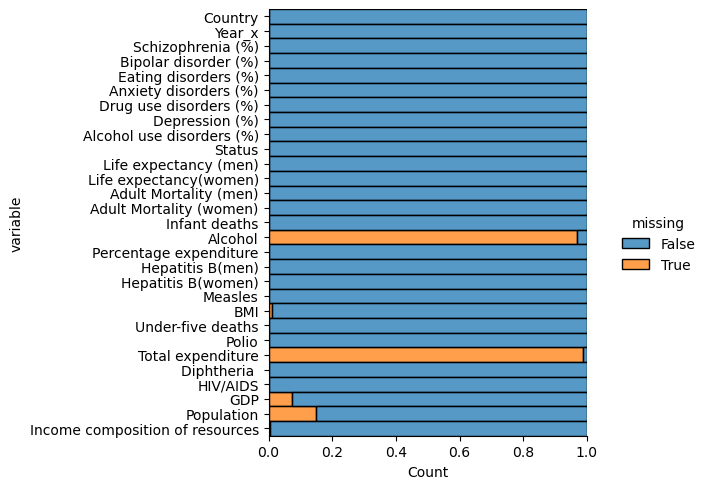

In [194]:
# Plot the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=mdata.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)